In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
!pip install kaggle

In [7]:
# configuring the path of Kaggle.json file
!mkd  ir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

/bin/bash: line 1: mkd: command not found


In [8]:
! kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:07<00:00, 26.9MB/s]
100% 163M/163M [00:07<00:00, 23.7MB/s]


In [9]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

kaggle.json  sample_data


In [12]:
import os
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files)

['with_mask_2613.jpg', 'with_mask_1771.jpg', 'with_mask_365.jpg', 'with_mask_129.jpg', 'with_mask_3317.jpg', 'with_mask_1925.jpg', 'with_mask_714.jpg', 'with_mask_2265.jpg', 'with_mask_2726.jpg', 'with_mask_2536.jpg', 'with_mask_801.jpg', 'with_mask_2244.jpg', 'with_mask_1560.jpg', 'with_mask_644.jpg', 'with_mask_1837.jpg', 'with_mask_1249.jpg', 'with_mask_703.jpg', 'with_mask_653.jpg', 'with_mask_3049.jpg', 'with_mask_924.jpg', 'with_mask_3710.jpg', 'with_mask_2132.jpg', 'with_mask_656.jpg', 'with_mask_210.jpg', 'with_mask_3587.jpg', 'with_mask_158.jpg', 'with_mask_1742.jpg', 'with_mask_1740.jpg', 'with_mask_1285.jpg', 'with_mask_3029.jpg', 'with_mask_335.jpg', 'with_mask_3253.jpg', 'with_mask_1525.jpg', 'with_mask_1833.jpg', 'with_mask_3065.jpg', 'with_mask_1808.jpg', 'with_mask_3240.jpg', 'with_mask_3031.jpg', 'with_mask_190.jpg', 'with_mask_3392.jpg', 'with_mask_3226.jpg', 'with_mask_2976.jpg', 'with_mask_1071.jpg', 'with_mask_1878.jpg', 'with_mask_237.jpg', 'with_mask_293.jpg', 'w

In [13]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files)

['without_mask_890.jpg', 'without_mask_3355.jpg', 'without_mask_2726.jpg', 'without_mask_3175.jpg', 'without_mask_2937.jpg', 'without_mask_318.jpg', 'without_mask_1591.jpg', 'without_mask_2998.jpg', 'without_mask_2009.jpg', 'without_mask_614.jpg', 'without_mask_1267.jpg', 'without_mask_1056.jpg', 'without_mask_26.jpg', 'without_mask_1359.jpg', 'without_mask_2425.jpg', 'without_mask_901.jpg', 'without_mask_3365.jpg', 'without_mask_2346.jpg', 'without_mask_1743.jpg', 'without_mask_3644.jpg', 'without_mask_1228.jpg', 'without_mask_350.jpg', 'without_mask_273.jpg', 'without_mask_3592.jpg', 'without_mask_2732.jpg', 'without_mask_2549.jpg', 'without_mask_3223.jpg', 'without_mask_2331.jpg', 'without_mask_2184.jpg', 'without_mask_330.jpg', 'without_mask_3301.jpg', 'without_mask_1866.jpg', 'without_mask_3021.jpg', 'without_mask_2072.jpg', 'without_mask_2461.jpg', 'without_mask_1518.jpg', 'without_mask_565.jpg', 'without_mask_1162.jpg', 'without_mask_752.jpg', 'without_mask_2230.jpg', 'without_m

In [16]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


### Creating labels for with mask and without mask
#### With mask-->1
#### Without mask-->0

In [17]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [18]:
print(with_mask_labels)
print(without_mask_labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [19]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [20]:
labels=with_mask_labels+without_mask_labels
print(len(labels))

7553


### Displaying the image

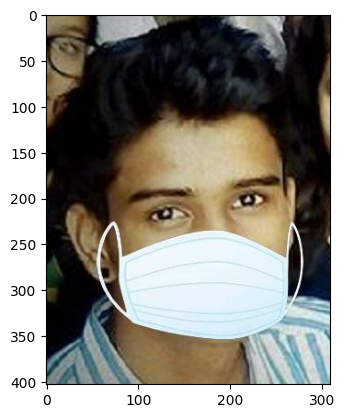

In [23]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1000.jpg')
imgplot = plt.imshow(img)
plt.show()

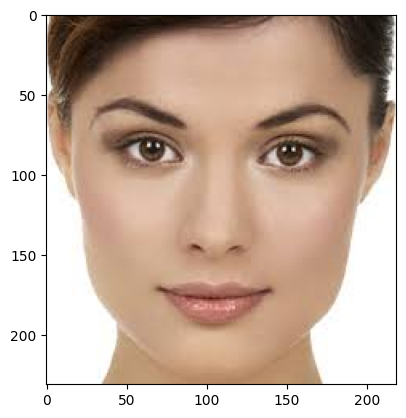

In [24]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1004.jpg')
imgplot = plt.imshow(img)
plt.show()

### Image Processing
   ##### 1.Resize image
   ##### 2.Convert the images to numpy arrays


In [25]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [26]:
type(data)

list

In [27]:
len(data)

7553

In [28]:
data[0]

array([[[ 6,  7,  9],
        [ 6,  7,  9],
        [ 7,  8, 10],
        ...,
        [41, 41, 33],
        [39, 39, 31],
        [36, 37, 29]],

       [[ 6,  7,  9],
        [ 6,  7,  9],
        [ 7,  8, 10],
        ...,
        [41, 41, 33],
        [40, 40, 32],
        [37, 38, 30]],

       [[ 6,  7,  9],
        [ 6,  7,  9],
        [ 7,  8, 10],
        ...,
        [42, 42, 34],
        [40, 41, 33],
        [38, 39, 31]],

       ...,

       [[ 3,  8, 10],
        [ 4, 15, 22],
        [ 2, 18, 27],
        ...,
        [ 1, 13,  7],
        [ 1, 11,  8],
        [ 4,  7, 12]],

       [[ 3,  7, 10],
        [ 3, 14, 21],
        [ 2, 17, 26],
        ...,
        [ 0, 12,  6],
        [ 1, 10,  8],
        [ 4,  7, 12]],

       [[ 2,  6,  9],
        [ 2, 14, 21],
        [ 1, 17, 26],
        ...,
        [ 0, 10,  6],
        [ 1,  9,  9],
        [ 4,  7, 12]]], dtype=uint8)

In [29]:
type(data[0])

numpy.ndarray

In [30]:
data[0].shape

(128, 128, 3)

In [33]:
# converting image list and label list to numpy arrays

x = np.array(data)
y = np.array(labels)

In [34]:
type(x)

numpy.ndarray

In [35]:
type(y)

numpy.ndarray

In [38]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


#### Splitting data into train and test

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [40]:
X_train.shape

(6042, 128, 128, 3)

In [41]:
X_test.shape

(1511, 128, 128, 3)

In [42]:
Y_train.shape

(6042,)

In [43]:
Y_test.shape

(1511,)

In [44]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [45]:
X_train_scaled[0]

array([[[0.11372549, 0.04313725, 0.03529412],
        [0.08235294, 0.03137255, 0.01960784],
        [0.07058824, 0.03529412, 0.01568627],
        ...,
        [0.49019608, 0.37254902, 0.39215686],
        [0.49803922, 0.36862745, 0.39215686],
        [0.50588235, 0.36862745, 0.39215686]],

       [[0.09803922, 0.03529412, 0.03529412],
        [0.08627451, 0.03529412, 0.02745098],
        [0.07843137, 0.03921569, 0.02745098],
        ...,
        [0.48235294, 0.38039216, 0.4       ],
        [0.48627451, 0.37647059, 0.4       ],
        [0.49411765, 0.37254902, 0.4       ]],

       [[0.07843137, 0.03529412, 0.03529412],
        [0.09019608, 0.03529412, 0.03921569],
        [0.09019608, 0.03529412, 0.03921569],
        ...,
        [0.47843137, 0.40392157, 0.42352941],
        [0.47843137, 0.39607843, 0.41568627],
        [0.48235294, 0.39215686, 0.41568627]],

       ...,

       [[0.45098039, 0.38431373, 0.41960784],
        [0.45098039, 0.38431373, 0.40784314],
        [0.44705882, 0

In [46]:
X_test_scaled[0]

array([[[0.96470588, 0.99215686, 0.96078431],
        [0.97647059, 0.98039216, 0.98039216],
        [0.97647059, 0.98039216, 0.98823529],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.48627451, 0.82352941, 0.93333333],
        [0.49411765, 0.82745098, 0.9372549 ],
        [0.46666667, 0.69803922, 0.8       ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.36862745, 0.76470588, 0.99607843],
        [0.36470588, 0.78431373, 0.99215686],
        [0.3372549 , 0.61960784, 0.79607843],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

### Building CNN

In [54]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [99]:
num_of_classes = 2

cnn = keras.Sequential()

cnn.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
cnn.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


cnn.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
cnn.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

cnn.add(keras.layers.Flatten())

cnn.add(keras.layers.Dense(128, activation='relu'))
cnn.add(keras.layers.Dropout(0.5))

cnn.add(keras.layers.Dense(64, activation='relu'))
cnn.add(keras.layers.Dropout(0.5))


cnn.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


In [100]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 57600)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [101]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [102]:
cnn.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
189/189 [==============================] - 152s 800ms/step - loss: 0.5859 - accuracy: 0.7519
Epoch 2/5
189/189 [==============================] - 147s 779ms/step - loss: 0.2893 - accuracy: 0.8838
Epoch 3/5
189/189 [==============================] - 147s 781ms/step - loss: 0.2306 - accuracy: 0.9071
Epoch 4/5
189/189 [==============================] - 146s 773ms/step - loss: 0.1837 - accuracy: 0.9318
Epoch 5/5
189/189 [==============================] - 153s 808ms/step - loss: 0.1684 - accuracy: 0.9374


### Model Evaluation

In [103]:
accuracy = cnn.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 11s 227ms/step - loss: 0.1835 - accuracy: 0.9332
Test Accuracy = [0.18353089690208435, 0.9331568479537964]


### Predictive System

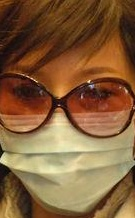

1/1 [==============================] - 0s 47ms/step
[[0.38245434 0.9430438 ]]
1
The person in the image is  wearing a mask


In [112]:
input_image_path = '/content/data/with_mask/with_mask_10.jpg'

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = cnn.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is  wearing a mask')